In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

In [119]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [120]:
train = train.drop('id', axis=1)
X = train.iloc[:, :-1]
y = train.iloc[:,-1]

In [6]:
# standardize dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# use gradient boosting regressor
gdreg = GradientBoostingRegressor()

In [18]:
gdreg.fit(X, y)

GradientBoostingRegressor()

In [20]:
y_pred = gdreg.predict(X)
print(mean_squared_error(y, y_pred))

698.9297253569353


In [66]:
gdreg.score(X, y)

0.002323933136357703

In [67]:
gdreg.n_estimators

100

In [103]:
y_axis = np.sort(gdreg.feature_importances_)[::-1]
sorted_index = np.argsort(gdreg.feature_importances_)[::-1]
columns = train.keys()[:-1][sorted_index]

Text(0, 0.5, 'Feature')

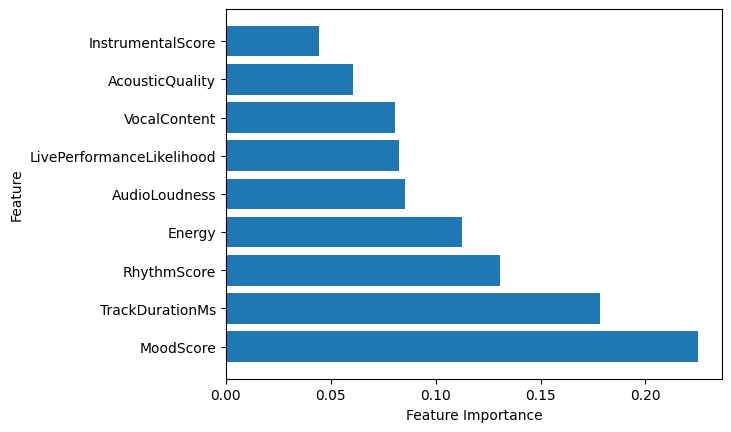

In [104]:
plt.barh(columns, y_axis)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

In [121]:
drop_columns = ['InstrumentalScore', 'AcousticQuality','VocalContent','LivePerformanceLikelihood', 'AudioLoudness']
train = train.drop(labels=drop_columns, axis=1)

In [122]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [123]:
X = scaler.fit_transform(X)

In [ ]:
gdreg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, max_features='sqrt')

In [130]:
gdreg.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6, max_features='sqrt',
                          n_estimators=500)

In [125]:
y_pred = gdreg.predict(X)
print(mean_squared_error(y, y_pred))

699.1994885848605


In [128]:
y_pred = gdreg.predict(X)
print(mean_squared_error(y, y_pred))

697.9637942134237


In [131]:
y_pred = gdreg.predict(X)
print(mean_squared_error(y, y_pred))

686.7350191181087


In [133]:
gdreg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, min_samples_leaf=10, subsample=0.8, max_features='sqrt', random_state=42)

In [134]:
gdreg.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6, max_features='sqrt',
                          min_samples_leaf=10, n_estimators=1000,
                          random_state=42, subsample=0.8)

In [135]:
y_pred = gdreg.predict(X)
print(mean_squared_error(y, y_pred))

677.0714769840058


In [136]:
from sklearn.metrics import mean_squared_error

min_mse, best_iter = float("inf"), 0
for i, y_pred in enumerate(gdreg.staged_predict(X)):
    mse = mean_squared_error(y, y_pred)
    if mse < min_mse:
        min_mse, best_iter = mse, i

print(f"Best iteration: {best_iter}, MSE: {min_mse:.2f}")

Best iteration: 999, MSE: 677.07


In [138]:
import joblib

In [141]:
joblib.dump(gdreg, 'model.joblib')

['model.joblib']